### Import Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

### Import Dataset

In [2]:
data = pd.read_csv("dataset.csv", index_col = "Dates", parse_dates = ["Dates"])
data.head()

,ticker,price,DTB3,"Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)","Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)",Weekly U.S. Product Supplied of Petroleum Products (Thousand Barrels per Day),"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)",Europe Brent Spot Price FOB (Dollars per Barrel),...,SSYM150D Index,SSYM300D Index,SSYM30DT Index,SSYM45CL Index,SSYM45DT Index,SSYM70DT Index,TANARATF Index,TANBRATF Index,TANCRATA Index,SPX Index
Dates,,,,,,,,,,,,,,,,,,,,,
1994-05-23,9130 JP Equity,2225.0,4.16,18.06,17.77,17.61,17.52,18131.0,18.69,16.63,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,5.78,0.47,453.20
1994-05-24,9130 JP Equity,2265.0,4.22,17.92,17.65,17.49,17.40,18131.0,18.40,16.63,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,5.78,0.47,454.81
1994-05-25,9130 JP Equity,2275.0,4.18,17.70,17.50,17.36,17.28,18131.0,17.83,16.33,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,5.78,0.47,456.34
1994-05-26,9130 JP Equity,2350.0,4.16,17.74,17.46,17.33,17.26,18131.0,17.76,16.08,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,5.78,0.47,457.06
1994-05-27,9130 JP Equity,2325.0,4.18,18.03,17.68,17.52,17.43,18426.0,18.02,16.08,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,5.78,0.47,457.33


**Data Information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 167756 entries, 1994-05-23 to 2021-12-15
Data columns (total 40 columns):
 #   Column                                                                                           Non-Null Count   Dtype  
---  ------                                                                                           --------------   -----  
 0   ticker                                                                                           167756 non-null  object 
 1   price                                                                                            167756 non-null  float64
 2   DTB3                                                                                             167755 non-null  float64
 3   Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)                                     167755 non-null  float64
 4   Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)                                     167755 no

**Drop Null Values**

In [4]:
df_c = data.dropna()

**Delete ticker column**

In [5]:
del df_c["ticker"]

**Features and Target**

In [6]:
X = df_c[df_c.columns.drop("price")]

y = df_c["price"]

**Statsmodel to find best features**

In [7]:
# building the model and fitting the data
log_reg = sm.OLS(y, X).fit()
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):              0.039
Method:                 Least Squares   F-statistic:                              164.6
Date:                Sat, 26 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:46:42   Log-Likelihood:                     -4.0197e+06
No. Observations:              147369   AIC:                                  8.039e+06
Df Residuals:                  147332   BIC:                                  8.040e+06
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
DTB3                                                                                             2.338e+10   2.76e+09      8.475      0.000     1.8e+10    2.88e+10
Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)                                     4.278e+08    1.1e+09      0.388      0.698   -1.74e+09    2.59e+09
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)                                    -1.579e+10   2.88e+09     -5.482      0.000   -2.14e+10   -1.01e+10
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)                                     4.514e+10   5.35e+09      8.439      0.000    3.47e+10    5.56e+10
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)                                    -2.952e+10   2.98e+09     -9.909      0.000   -3.54e+10   -2.37e+10
Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)                  -1.012e+06   5.18e+05     -1.956      0.051   -2.03e+06    2300.932
Cushing, OK WTI Spot Price FOB (Dollars per Barrel)                                             -3.784e+08   9.81e+08     -0.386      0.700    -2.3e+09    1.54e+09
Europe Brent Spot Price FOB (Dollars per Barrel)                                                 3.774e+08   1.91e+08      1.972      0.049    2.38e+06    7.52e+08
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)                -1.58e+10   7.43e+09     -2.127      0.033   -3.04e+10   -1.24e+09
U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)                 7.06e+09   6.85e+09      1.030      0.303   -6.37e+09    2.05e+10
New York Harbor No. 2 Heating Oil Spot Price FOB (Dollars per Gallon)                            -8.24e+08   9.07e+09     -0.091      0.928   -1.86e+10     1.7e+10
Weekly U.S. Ending Stocks of Crude Oil and Petroleum Products  (Thousand Barrels)                1.404e+05   1.32e+04     10.602      0.000    1.14e+05    1.66e+05
Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products  (Thousand Barrels) -2.071e+05   1.86e+04    -11.156      0.000   -2.43e+05   -1.71e+05
Weekly U.S. Ending Stocks of Crude Oil  (Thousand Barrels)                                       1.431e+05   1.71e+04      8.379      0.000     1.1e+05    1.77e+05
Weekly U.S. Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)                        -2.045e+05   2.12e+04     -9.624      0.000   -2.46e+05   -1.63e+05
U.S. Gulf Coast Kerosene-Type Je

**Keep Columns which have pvalue <= 0.05 as they are significant**

In [8]:
keep_pvals = log_reg.pvalues[log_reg.pvalues <= 0.05]

In [9]:
keep_pvals

DTB3                                                                                               2.380040e-17
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)                                       4.215175e-08
Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)                                       3.241393e-17
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)                                       3.849534e-23
Europe Brent Spot Price FOB (Dollars per Barrel)                                                   4.856464e-02
New York Harbor Conventional Gasoline Regular Spot Price FOB (Dollars per Gallon)                  3.346187e-02
Weekly U.S. Ending Stocks of Crude Oil and Petroleum Products  (Thousand Barrels)                  2.973988e-26
Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products  (Thousand Barrels)    6.858344e-29
Weekly U.S. Ending Stocks of Crude Oil  (Thousand Barrels)                                         5.370

**Select Columns which have high tvalues and p-value <= 0.05**

In [10]:
log_reg.tvalues.sort_values()

T10Y2Y                                                                                            -18.505331
DFF                                                                                               -13.081632
Weekly U.S. Ending Stocks excluding SPR of Crude Oil and Petroleum Products  (Thousand Barrels)   -11.156211
SSYM30DT Index                                                                                    -10.495113
Cushing, OK Crude Oil Future Contract 4 (Dollars per Barrel)                                       -9.909488
Weekly U.S. Ending Stocks excluding SPR of Crude Oil  (Thousand Barrels)                           -9.623707
Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)                              -6.301877
TANCRATA Index                                                                                     -6.154643
Cushing, OK Crude Oil Future Contract 2 (Dollars per Barrel)                                       -5.481880
D08BUKUG Index     

### Selected Data To use for Modeling

In [11]:
df = data[["Weekly U.S. Ending Stocks of Crude Oil and Petroleum Products  (Thousand Barrels)",
           "DTB3",
           "Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)",
           "Weekly U.S. Ending Stocks of Crude Oil  (Thousand Barrels)",
           "D08TAGSG Index",
           "price"]]
df.head()

,Weekly U.S. Ending Stocks of Crude Oil and Petroleum Products (Thousand Barrels),DTB3,"Cushing, OK Crude Oil Future Contract 3 (Dollars per Barrel)",Weekly U.S. Ending Stocks of Crude Oil (Thousand Barrels),D08TAGSG Index,price
Dates,,,,,,
1994-05-23,1582347.0,4.16,17.61,908347.0,5.44,2225.0
1994-05-24,1582347.0,4.22,17.49,908347.0,5.44,2265.0
1994-05-25,1582347.0,4.18,17.36,908347.0,5.44,2275.0
1994-05-26,1582347.0,4.16,17.33,908347.0,5.44,2350.0
1994-05-27,1580432.0,4.18,17.52,907253.0,5.44,2325.0


**Fill Null Values with Average**

In [12]:
df = df.fillna(df.mean())

**Select Features and Target Variables**

In [13]:
X = df[df.columns.drop("price")]

y = df["price"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.1,
                                                    shuffle = False)

**Scale features through Standard Scaler**

In [15]:
scaler = StandardScaler()

scaler_train = scaler.fit_transform(X_train)
scaler_test = scaler.transform(X_test)

### Linear Regression

In [16]:
lr = LinearRegression()

lr.fit(scaler_train, y_train)

pred_lr = lr.predict(scaler_test)
data_lr = pd.DataFrame({"Actual": y_test,
                        "Predicted": pred_lr})
data_lr

,Actual,Predicted
Dates,,
2014-09-12,31.92,523.824244
2014-09-15,30.80,516.756035
2014-09-16,33.76,527.201390
2014-09-17,33.76,523.258429
2014-09-18,32.80,515.064112
...,...,...
2021-12-09,12400.00,349.148372
2021-12-10,12350.00,373.727223
2021-12-13,12350.00,370.786944


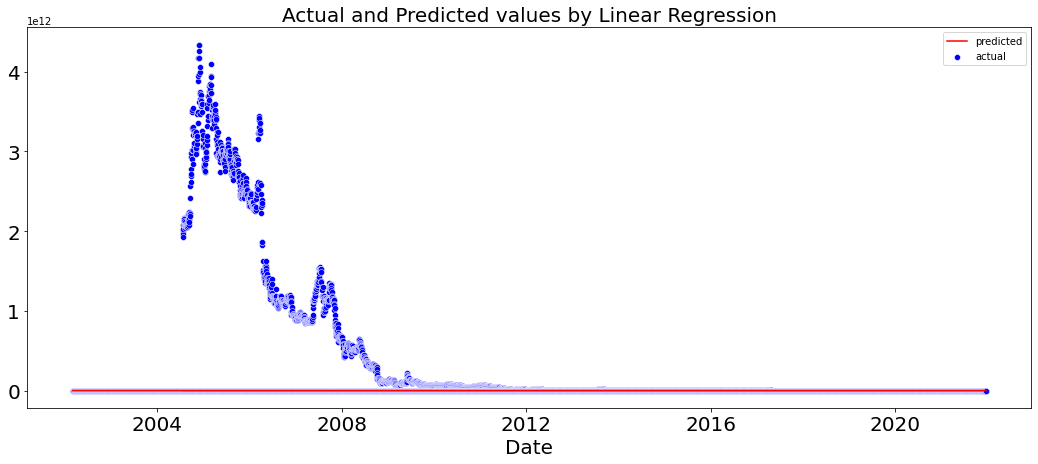

In [17]:
plt.figure(figsize = (18, 7))
plt.title("Actual and Predicted values by Linear Regression", size = 20)
sns.scatterplot(x = data_lr.index, y = data_lr["Actual"], color = "blue", label = "actual")
sns.lineplot(x = data_lr.index, y = data_lr["Predicted"], color = "red", label = "predicted")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Date", size = 20)
plt.ylabel(None)
plt.legend()
plt.show()

### Support Vector Regression

In [ ]:
svr = SVR()

svr.fit(scaler_train, y_train)

pred_svr = svr.predict(scaler_test)
data_svr = pd.DataFrame({"Actual": y_test,
                        "Predicted": pred_svr})
data_svr

In [ ]:
plt.figure(figsize = (18, 7))
plt.title("Actual and Predicted values by Linear Regression", size = 20)
sns.scatterplot(x = data_lr.index, y = data_lr["Actual"], color = "blue", label = "actual")
sns.lineplot(x = data_lr.index, y = data_lr["Predicted"], color = "red", label = "predicted")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Date", size = 20)
plt.ylabel(None)
plt.legend()
plt.show()

### Decision Tree Regression

In [18]:
dtr = DecisionTreeRegressor()

dtr.fit(scaler_train, y_train)

pred_dtr = dtr.predict(scaler_test)
data_dtr = pd.DataFrame({"Actual": y_test,
                        "Predicted": pred_dtr})
data_dtr

,Actual,Predicted
Dates,,
2014-09-12,31.92,681.887323
2014-09-15,30.80,670.931954
2014-09-16,33.76,685.158935
2014-09-17,33.76,668.123108
2014-09-18,32.80,642.808146
...,...,...
2021-12-09,12400.00,680.183463
2021-12-10,12350.00,702.899757
2021-12-13,12350.00,712.882560


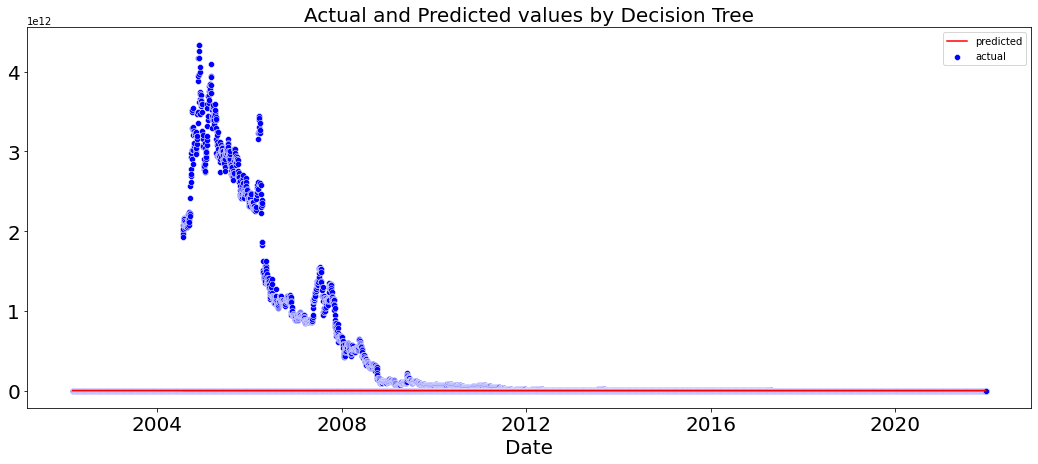

In [19]:
plt.figure(figsize = (18, 7))
plt.title("Actual and Predicted values by Decision Tree", size = 20)
sns.scatterplot(x = data_dtr.index, y = data_dtr["Actual"], color = "blue", label = "actual")
sns.lineplot(x = data_dtr.index, y = data_dtr["Predicted"], color = "red", label = "predicted")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Date", size = 20)
plt.ylabel(None)
plt.legend()
plt.show()

### Random Forest

In [21]:
rf = RandomForestRegressor()

rf.fit(scaler_train, y_train)

pred_rf = dtr.predict(scaler_test)
data_rf = pd.DataFrame({"Actual": y_test,
                        "Predicted": pred_rf})
data_rf

,Actual,Predicted
Dates,,
2014-09-12,31.92,681.887323
2014-09-15,30.80,670.931954
2014-09-16,33.76,685.158935
2014-09-17,33.76,668.123108
2014-09-18,32.80,642.808146
...,...,...
2021-12-09,12400.00,680.183463
2021-12-10,12350.00,702.899757
2021-12-13,12350.00,712.882560


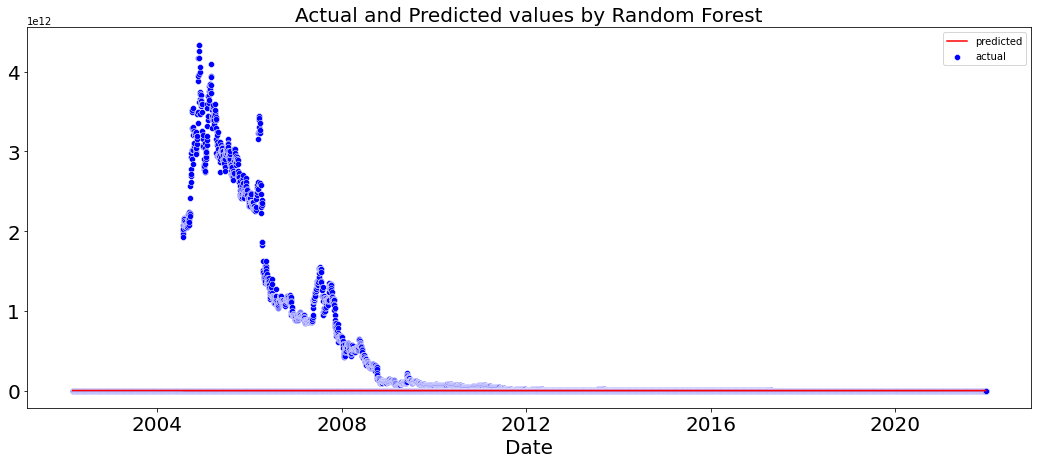

In [22]:
plt.figure(figsize = (18, 7))
plt.title("Actual and Predicted values by Random Forest", size = 20)
sns.scatterplot(x = data_rf.index, y = data_rf["Actual"], color = "blue", label = "actual")
sns.lineplot(x = data_rf.index, y = data_rf["Predicted"], color = "red", label = "predicted")
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.xlabel("Date", size = 20)
plt.ylabel(None)
plt.legend()
plt.show()